In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip C:\\Users\\karth\\Downloads\\kddcup.data_10_percent.gz

unzip:  cannot find or open C:\Users\karth\Downloads\kddcup.data_10_percent.gz, C:\Users\karth\Downloads\kddcup.data_10_percent.gz.zip or C:\Users\karth\Downloads\kddcup.data_10_percent.gz.ZIP.


In [ ]:
df=pd.read_csv('/content/kddcup.data_10_percent_corrected')

In [ ]:
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
path='/content/kddcup.data_10_percent_corrected'

In [ ]:

cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:

df = pd.read_csv(path,names=columns)
#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df['Attack Type'].value_counts()

,count
Attack Type,
dos,391458
normal,97278
probe,4107
r2l,1126
u2r,52


In [ ]:
def bar_graph(feature,filename):
  plt.figure(figsize=(10,5))
  df[feature].value_counts().plot(kind="bar")
  plt.title(f"bar garph of {feature}")
  plt.savefig(f"C:\\Users\\karth\\Desktop\\Datasets\\{filename}.png")
  plt.show()

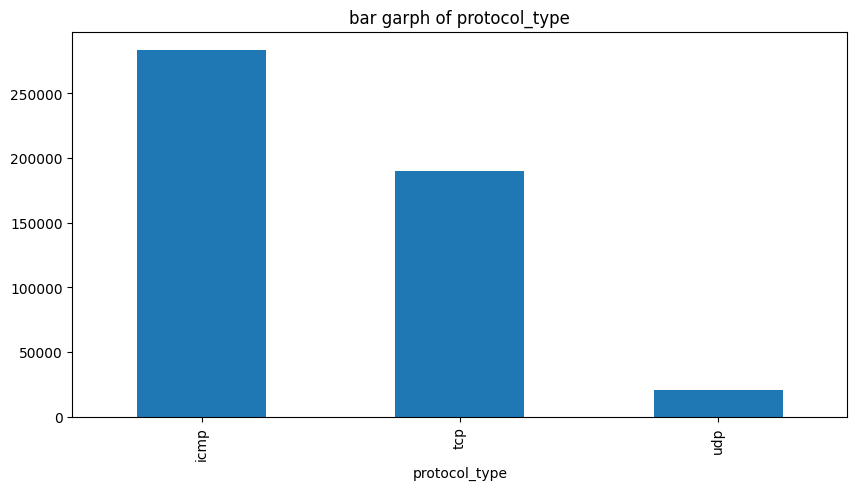

In [ ]:
bar_graph('protocol_type', 'protocol_type')

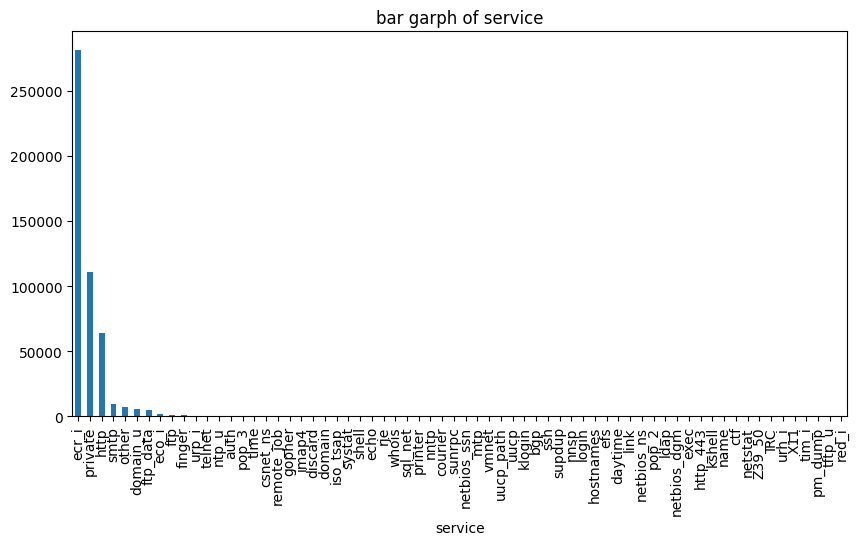

In [ ]:
bar_graph('service', 'service')

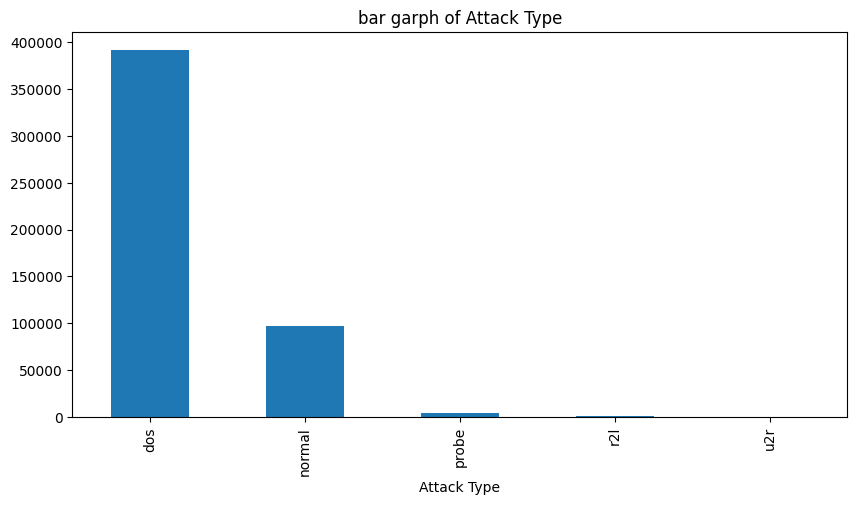

In [ ]:
bar_graph('Attack Type','attack type')

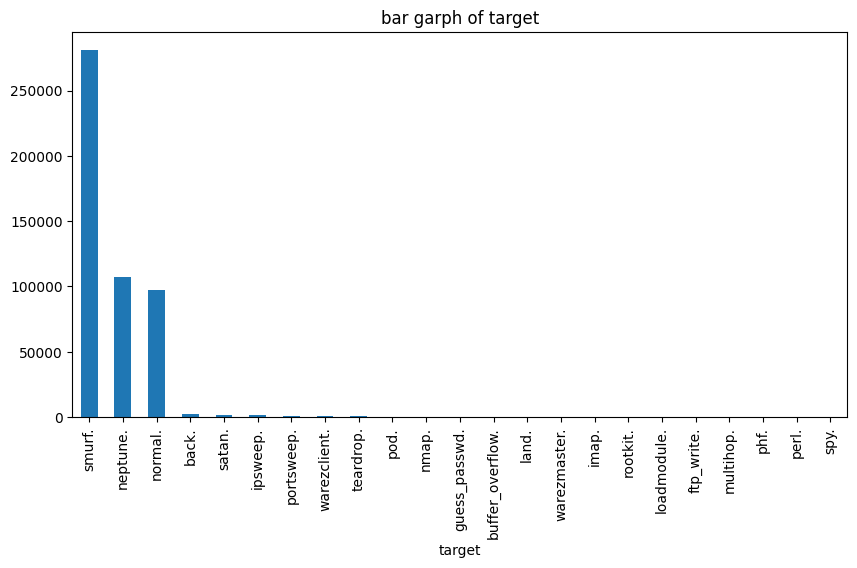

In [ ]:

bar_graph('target', 'target')

In [ ]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


In [ ]:
print(df.columns)

df=df.dropna(axis=1)

# Keep columns where there are more than 1 unique values
df=df[[col for col in df if df[col].nunique()>1]]

#select numerical columns for correlation
df_numeric=df.select_dtypes(include=['number'])

#calculate the correlation for matrix
corr=df_numeric.corr()


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


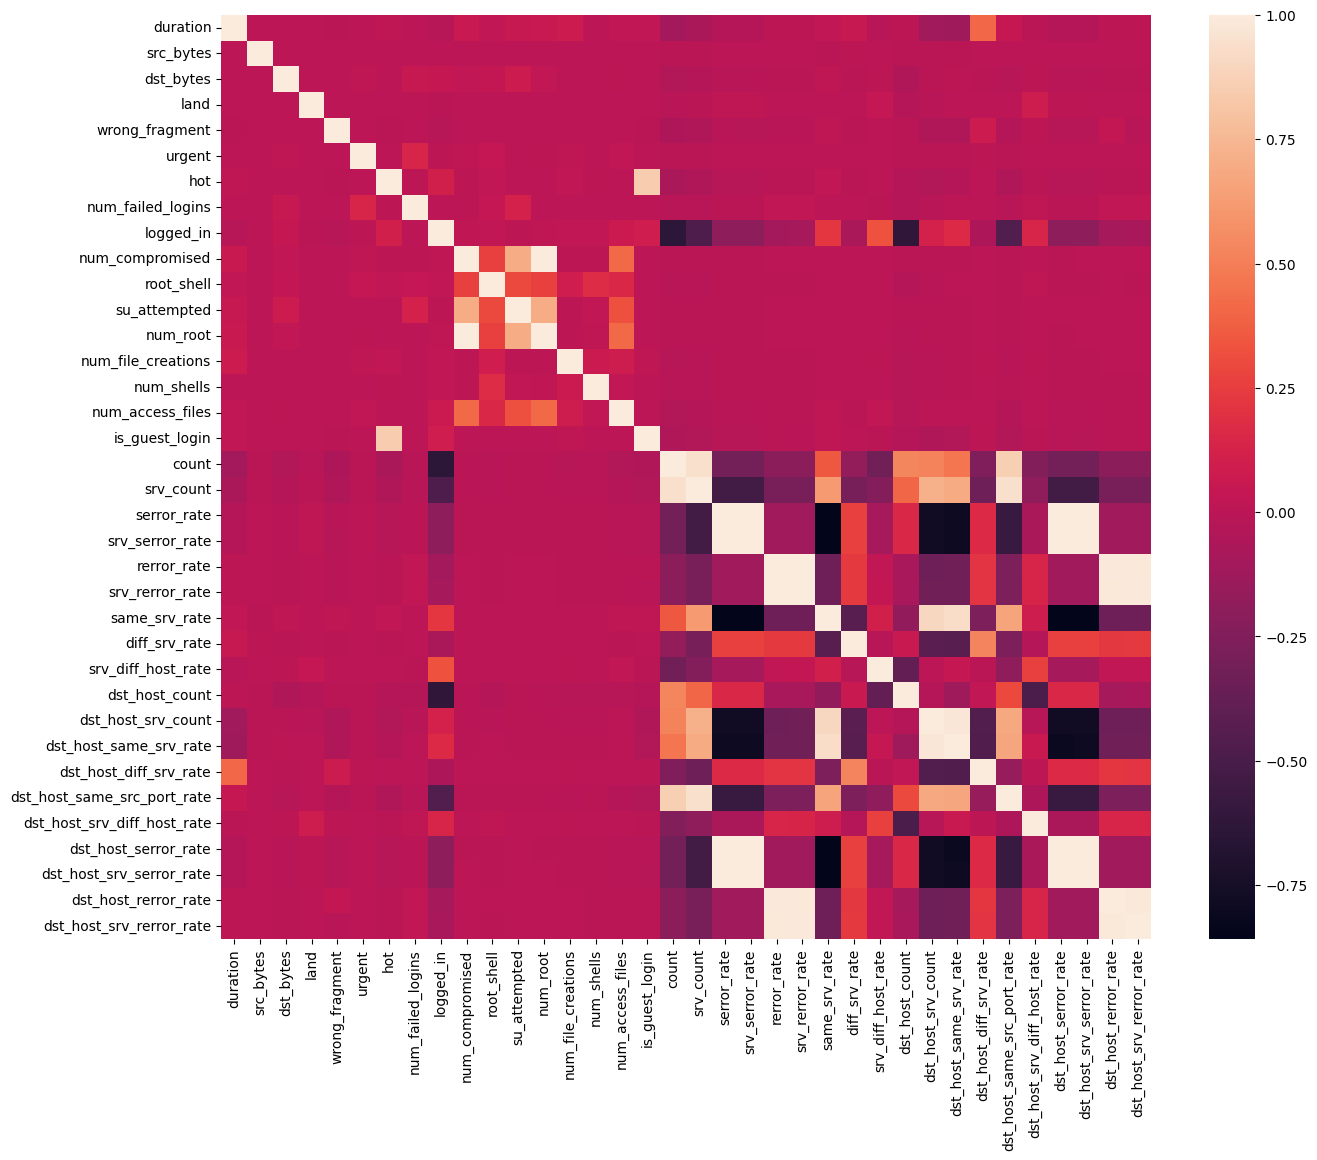

In [ ]:
plt.figure(figsize=(15,12))

sns.heatmap(corr)
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
# Check if the column exists before dropping
if 'num_root' in df.columns:
    df.drop('num_root', axis=1, inplace=True)

if 'srv_serror_rate' in df.columns:
    df.drop('srv_serror_rate', axis=1, inplace=True)

if 'srv_rerror_rate' in df.columns:
    df.drop('srv_rerror_rate', axis=1, inplace=True)

if 'dst_host_srv_serror_rate' in df.columns:
    df.drop('dst_host_srv_serror_rate', axis=1, inplace=True)

if 'dst_host_serror_rate' in df.columns:
    df.drop('dst_host_serror_rate', axis=1, inplace=True)

if 'dst_host_srv_rerror_rate' in df.columns:
    df.drop('dst_host_srv_rerror_rate', axis=1, inplace=True)

if 'dst_host_same_srv_rate' in df.columns:
    df.drop('dst_host_same_srv_rate', axis=1, inplace=True)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.0,9,9,0.0,0.11,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.0,19,19,0.0,0.05,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.0,29,29,0.0,0.03,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.0,39,39,0.0,0.03,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.0,49,49,0.0,0.02,0.0,0.0,normal.,normal


**feature encoding
**

In [ ]:
#protocol_type feature mapping
pmap={'icmp':0,'tcp':1,'udp':2}
df['protocol_type']=df['protocol_type'].map(pmap)

In [ ]:

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
#attack type feature mapping
amap={'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df['Attack Type']=df['Attack Type'].map(amap)

In [ ]:
df.drop('service',axis=1,inplace=True)

**models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Conv1D,MaxPooling1D,Flatten,Input,Concatenate,Add

In [ ]:
# Check if the column exists before dropping
if 'target' in df.columns:
    df=df.drop(['target',],axis=1)
print(df.shape)

X=df.drop(['Attack Type',],axis=1)
Y=df[['Attack Type']]

sc=MinMaxScaler()
X=sc.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(494021, 32)
(330994, 31) (163027, 31)
(330994, 1) (163027, 1)


In [ ]:
df.to_csv("ids.csv",index=False)

In [ ]:
pd.read_csv("ids.csv")

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.00,9,9,0.0,0.11,0.00,0.0,1
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.00,19,19,0.0,0.05,0.00,0.0,1
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.00,29,29,0.0,0.03,0.00,0.0,1
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.00,39,39,0.0,0.03,0.00,0.0,1
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.00,49,49,0.0,0.02,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,1.0,0.0,0.40,86,255,0.0,0.01,0.05,0.0,1
494017,0,1,0,282,2286,0,0,0,0,0,...,1.0,0.0,0.00,6,255,0.0,0.17,0.05,0.0,1
494018,0,1,0,203,1200,0,0,0,0,0,...,1.0,0.0,0.17,16,255,0.0,0.06,0.05,0.0,1
494019,0,1,0,291,1200,0,0,0,0,0,...,1.0,0.0,0.17,26,255,0.0,0.04,0.05,0.0,1


**ANN MODEL**

In [ ]:
ann_model=Sequential([
    Dense(1024,input_dim=31,activation='relu'),
    Dropout(0.40),
    Dense(5,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train the model with early stopping
ann_model.fit(X_train, Y_train.values.ravel(), epochs=5, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9887 - loss: 0.0400 - val_accuracy: 0.9981 - val_loss: 0.0060
Epoch 2/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9986 - loss: 0.0055 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 3/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9987 - loss: 0.0051 - val_accuracy: 0.9989 - val_loss: 0.0040
Epoch 4/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9990 - val_loss: 0.0037
Epoch 5/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.9991 - val_loss: 0.0037


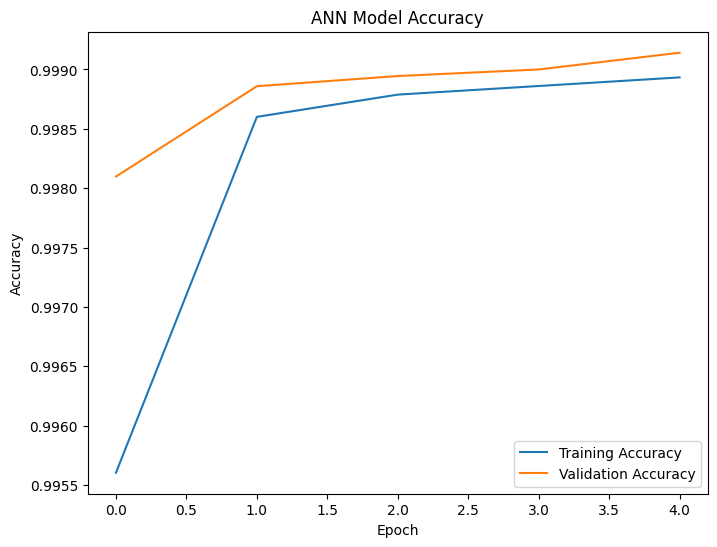

In [ ]:
history = ann_model.history

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/ann_accuracy.png')


plt.show()

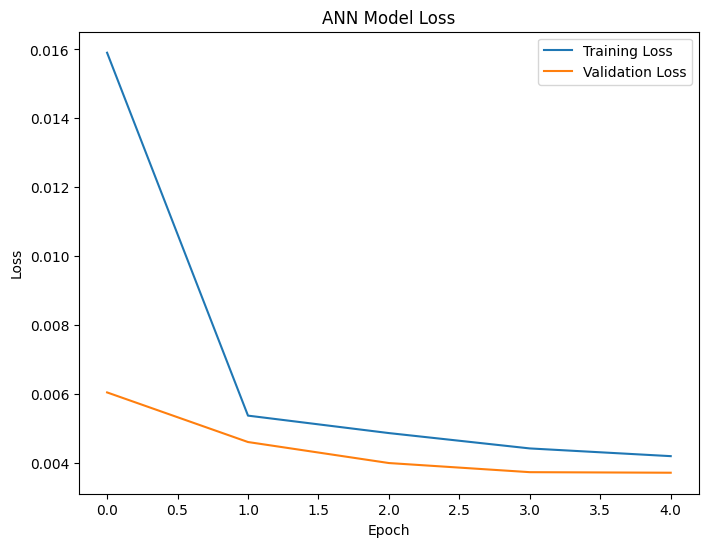

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/ann_loss.png')

plt.show()

**DNN(DEEP NEURAL NETWORK)**

In [ ]:

deep_model = Sequential([
    Dense(1024, input_dim=31, activation='relu'),
    Dropout(0.10),
    Dense(768, activation='relu'),
    Dropout(0.10),
    Dense(512, activation='relu'),
    Dropout(0.10),
    Dense(256, activation='relu'),
    Dropout(0.10),
    Dense(128, activation='relu'),
    Dropout(0.10),
    Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
deep_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
deep_model.fit(X_train, Y_train.values.ravel(), epochs=5, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 267s 26ms/step - accuracy: 0.9916 - loss: 0.0322 - val_accuracy: 0.9986 - val_loss: 0.0064
Epoch 2/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 305s 24ms/step - accuracy: 0.9980 - loss: 0.0093 - val_accuracy: 0.9989 - val_loss: 0.0062
Epoch 3/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 247s 24ms/step - accuracy: 0.9985 - loss: 0.0087 - val_accuracy: 0.9988 - val_loss: 0.0066
Epoch 4/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 256s 23ms/step - accuracy: 0.9986 - loss: 0.0065 - val_accuracy: 0.9988 - val_loss: 0.0052
Epoch 5/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 261s 23ms/step - accuracy: 0.9986 - loss: 0.0072 - val_accuracy: 0.9965 - val_loss: 0.0097


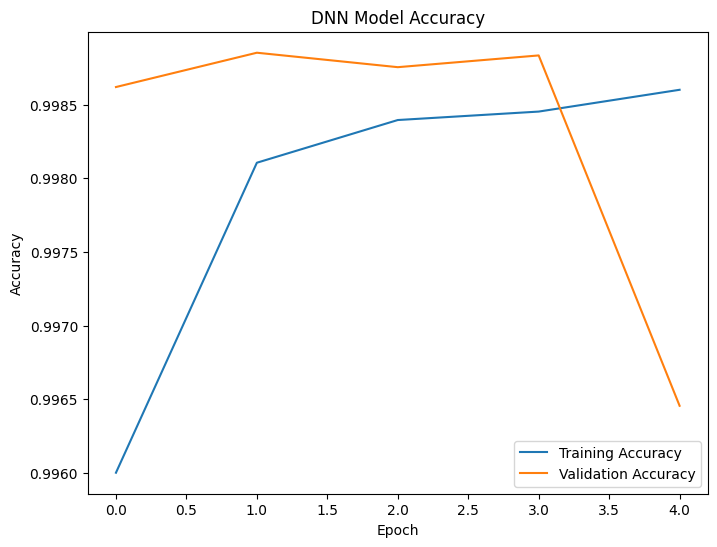

In [ ]:
history = deep_model.history

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/deep_accuracy.png')
plt.show()

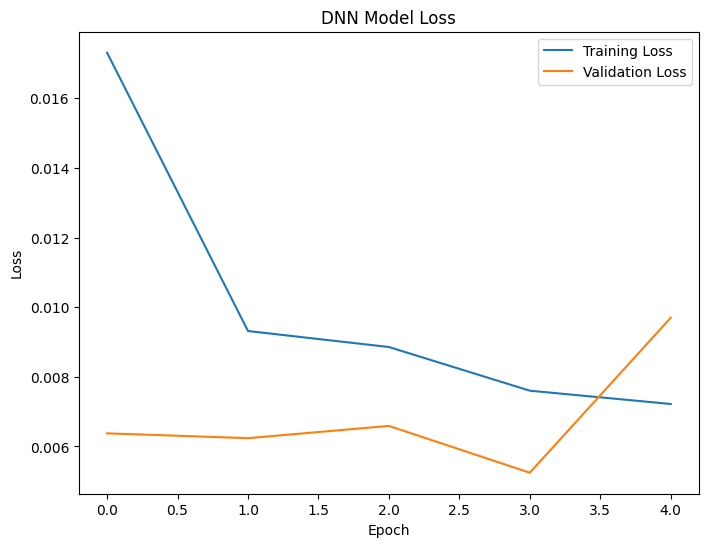

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/deep_loss.png')

plt.show()

**CNN**

In [ ]:
inputs = Input(shape=(31, 1))
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y1 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y2 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(124, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(5, activation='softmax')(y)

y = Concatenate()([y, y1, y2])

outputs = Dense(5, activation='softmax')(y)
cnn_model = Model(inputs=inputs, outputs=outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
cnn_model.fit(X_train.reshape((-1,31,1)), Y_train.values.ravel(), epochs=5, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 129s 13ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9984 - val_loss: 0.0057
Epoch 2/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9988 - val_loss: 0.0045
Epoch 3/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 145s 13ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 4/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 131s 13ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 5/5
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 131s 13ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 0.9989 - val_loss: 0.0044


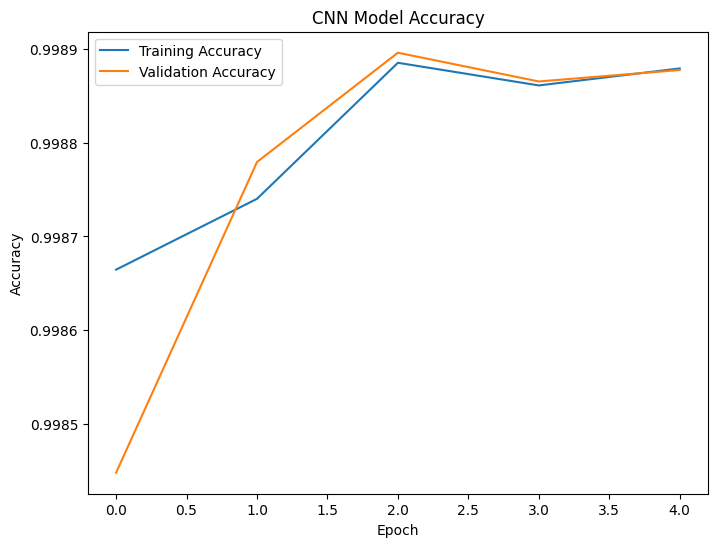

In [ ]:

# Get training and validation accuracy and loss values
history = cnn_model.history

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/cnn_accuracy.png')
plt.show()

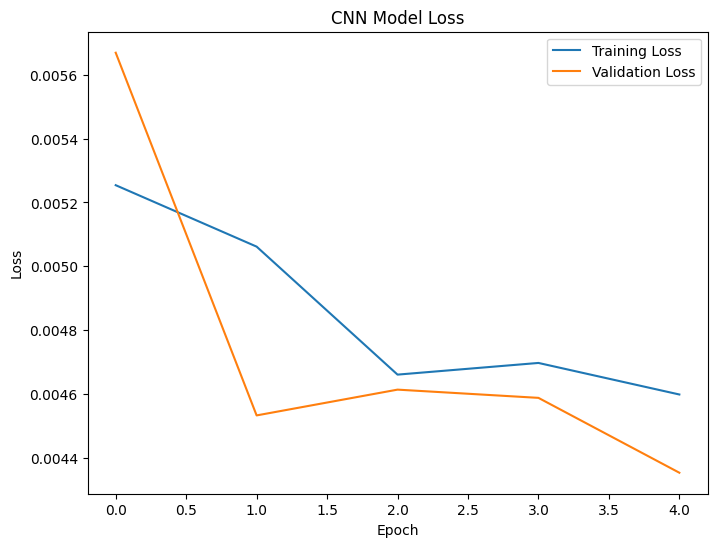

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/cnn_loss.png')

plt.show()

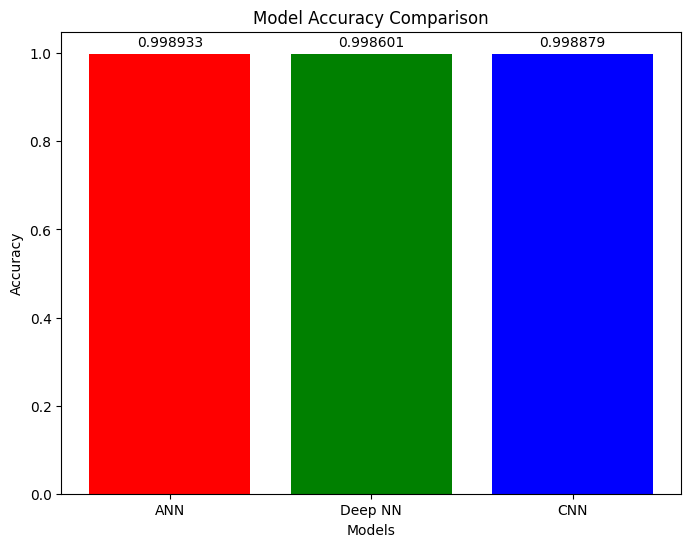

In [ ]:
import matplotlib.pyplot as plt

models = ['ANN', 'Deep NN', 'CNN']
accuracies = [
    ann_model.history.history['accuracy'][-1],
    deep_model.history.history['accuracy'][-1],
    cnn_model.history.history['accuracy'][-1]
]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['red', 'green', 'blue'])

# Annotate bars with accuracy scores
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(accuracy, 6), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Save the plot as a PNG file
plt.savefig('/content/model_comparison.png')

# Show the plot
plt.show()